# Hamoye Stage A Data Science Internship

Hi, I am Shivam Singh Rathore , Data Science Intern at Hamoye AI. Following is my Stage A Exploratory Data Analysis on the fuel data set as described below.

### Dataset Description


The data provided in this <a href='https://bit.ly/HDSC-StageOneDataset'>Github link</a> is the fuel quality data from the Federal Energy Regulatory Commission which is provided by the United States Energy Information Administration. The data consists of the following columns:

'Record_id' : record id <span style="border-left:2px solid black;height:2px;margin-left:300px;padding-left:30px;">'Utility_id_ferc1': Utility id assigned by the FERC</span>

'Report_year': year of report <span style="border-left:2px solid black;height:2px;margin-left:263px;padding-left:30px;">'Plant_name_ferc1': the name of the plant </span>


'Fuel_type_code_pudl': the type of fuel <span style="border-left:2px solid black;height:2px;margin-left:198px;padding-left:30px;">'Fuel_unit': the unit of fuel</span>


'Fuel_qty_burned': the quantity of fuel burned <span style="border-left:2px solid black;height:2px;margin-left:156px;padding-left:30px;">'Fuel_mmbtu_per_unit': the measure of energy per unit</span>


'fuel_cost_per_unit_burned': the fuel cost per unit burned <span style="border-left:2px solid black;height:2px;margin-left:84px;padding-left:30px;">'Fuel_cost_per_unit_delivered': the cost of fuel delivered per unit </span>


'fuel_cost_per_mmbtu': the cost of fuel per mmbtu 
<hr style="width:100%; height:1px; background: #000">


# Exploratory Data Analysis

##  a) Loading Data set:

In [38]:
#Importing important libaries
import pandas as pd
import numpy as np
import missingno as msno # For visualizing missing values

#Importing dataset filepath from local machine
file_path = "/home/shivam/Documents/Hamoye Data Science Internship/Stage A/Dataset/fuel_ferc1.csv"

df= pd.read_csv(file_path)
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


# b) Descriptive statistics of data:


In [36]:
# Including the null values 
df.describe(include ='all')



,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2007_12_100_0_12,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [3]:
# Getting the Glimpse of the Dataset
df.sample(5)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
5716,f1_fuel_1998_12_145_1_7,145,1998,valmont 5,coal,ton,592834.0,21.842000,24.875,25.128,1.139
2344,f1_fuel_1995_12_133_1_15,133,1995,potrero units 4-5-6,oil,bbl,26355.0,5.830734,32.990,0.000,5.660
12892,f1_fuel_2004_12_144_1_4,144,2004,cayuga ct,gas,mcf,136135.0,1.000000,12.314,12.314,12.265
26902,f1_fuel_2016_12_294_0_11,294,2016,prairie state,gas,mmbtu,8434.0,1.030000,5.870,5.870,5.870
11566,f1_fuel_2003_12_45_1_10,45,2003,riverbend,coal,ton,1102201.0,24.154000,43.330,45.020,1.794


In [31]:
# Printing the Information regarding dataset

print("Info",df.info())

# No of rows and columns in Dataset
print('\n\nThe dataset contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB
Info None


The dataset contains 29523 rows and 11 columns


# c) Exploring the Fuel dataset

In [6]:
# Knowing the Unique Utility IDs and their no:
print("ID of Utilities:",df['utility_id_ferc1'].unique(),"\n\nThe Number of Utlities:",df['utility_id_ferc1'].nunique())

ID of Utilities: [  1   2   4   6   7   9  10  11  12  15  16  17  20  24  26 191  31   8
  42  43  44  46  50  51  54  55  38  73  81 127  19  36  61  63  64  68
  70  72  74  75  77  79  80  85  96  97  98  99  27  30  52 135  69  87
  88 121 122 102 193 194 125 126 128 129 130 131 132 134 137 141 142 143
 145 117 146 150 151 157 114 115 118 161 162 163 164 166 169 170 173 176
 177 179 182 185 186 187 188 189  33  89 200 201 204 208 159 119  25  49
 108 155 100 107 144 116 136  67  82  95 133 138 148 190  56 113  32 120
 147 160 175  22  39  62  76 101 124 154 156 174 195 104  14  57  41  45
 149 213 210  29  94 230  71  21 202 244 226 227  65 171 181 221 266 245
 270 276 203 271 283 281 285 287 196 288 294 262 178  58 432 315 403 449
 452 192 454 513 514] 

The Number of Utlities: 185


In [7]:
# Years for which Data is collected

print("Years for Which Data is Collected:",df['report_year'].unique(),"\n\nTotal Years:",df['report_year'].nunique(),"\n")

Years for Which Data is Collected: [1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018] 

Total Years: 25 



In [9]:
# Types of Plants

print("The Types of plants:",df['plant_name_ferc1'].unique(),"\n\nTotal Number of Plants:",df['plant_name_ferc1'].nunique())

The Types of plants: ['rockport' 'rockport total plant' 'gorgas' ... 'airport unit 6'
 'wyodak - bhp 20%' 'wygen 3 bhp 52%'] 

Total Number of Plants: 2315


In [10]:
# Types of Fuel 

print("The Types of fuel:",df['fuel_type_code_pudl'].unique(),"\n\nTotal types of Fuel:",df['fuel_type_code_pudl'].nunique())

The Types of fuel: ['coal' 'gas' 'nuclear' 'oil' 'waste' 'other'] 

Total types of Fuel: 6


In [33]:
# View the datatypes of each feature
df.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

__From this we have 4 categorical features and 7 numerical features__

In [34]:
# Let us get the numerical and categorical features as list
categorical_features = df.select_dtypes(include='object').columns.to_list()
numerical_features = df.select_dtypes(include='number').columns.to_list()

print("Categorical Features: ",categorical_features)
print("Numerical Features: ",numerical_features)

Categorical Features:  ['record_id', 'plant_name_ferc1', 'fuel_type_code_pudl', 'fuel_unit']
Numerical Features:  ['utility_id_ferc1', 'report_year', 'fuel_qty_burned', 'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu']


# d) Check for Missing values:

In [35]:
df.isna().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

__We have 180 missing rows in fuel dataset namely in the fuel_unit.__

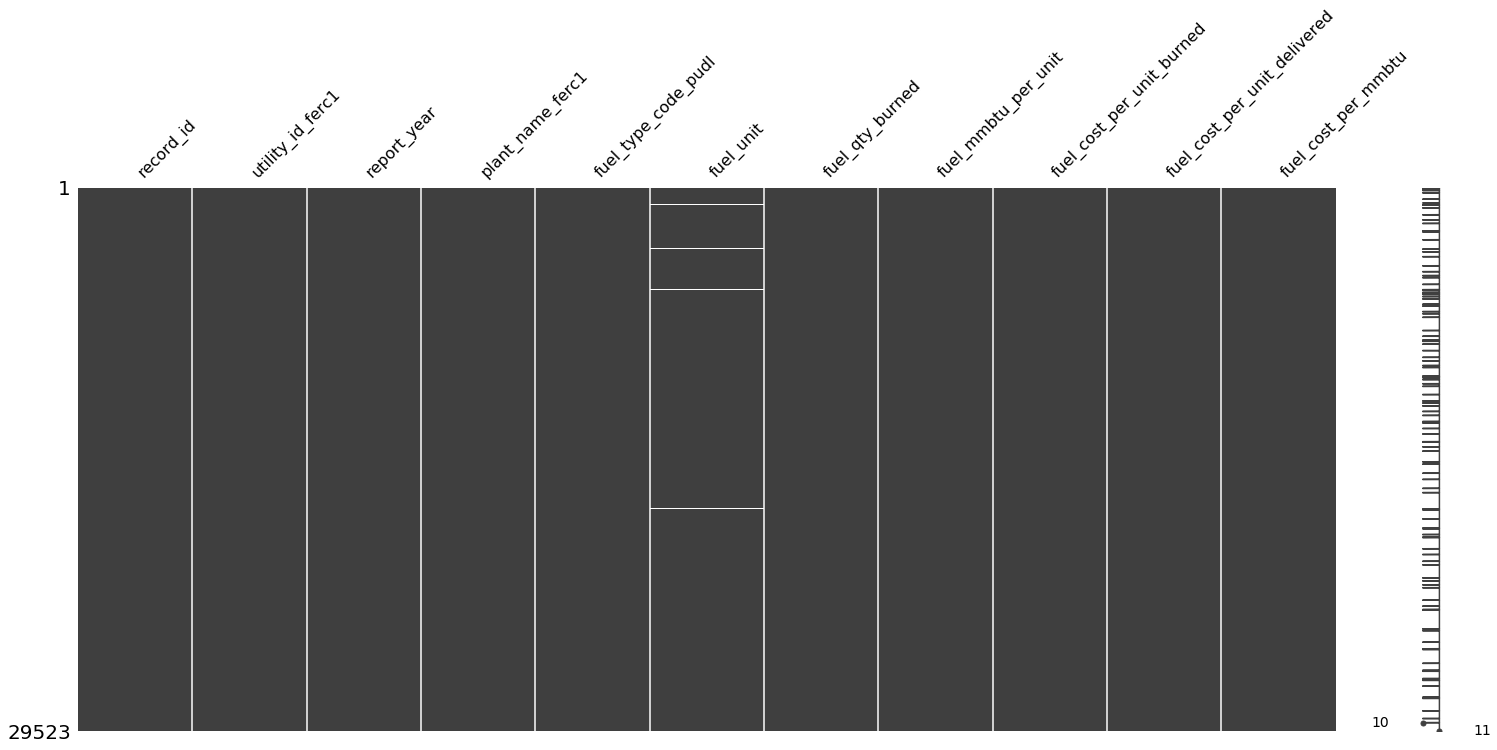

In [40]:
# Plot to show the areas where the missing values are located
msno.matrix(df)

__The horizontal lines in fuel_unit column shows the areas where the missing data are located and it also indicates that the number of missing values is small compared to the entire dataset.
We will fix the missing values later in the exploration__

Observations
* There is a total of 29523 rows
* There is no duplicate in the dataset since the record_id column contains 29523 unique items
* We have 2315 unique plants.
* There seems to be an outlier in fuel_cost_per_unit_burned, fuel_cost_per_unit_delivered &
          fuel_cost_per_mmbtu because there is a huge difference between the max value and where
          the 75% of the data lies


# e) Visualising the Data

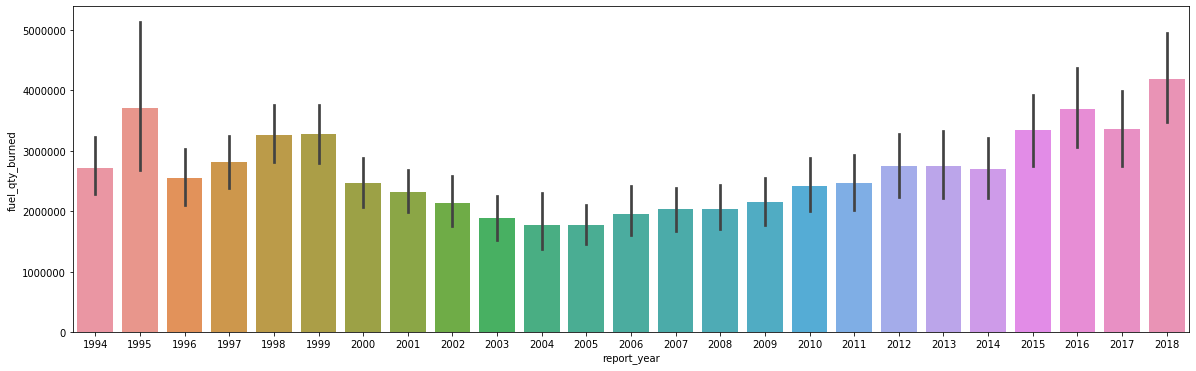

In [13]:
# 1.1 Quanttity of fuel burned in years

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,6))
ax = sns.barplot(df['report_year'],df['fuel_qty_burned'])

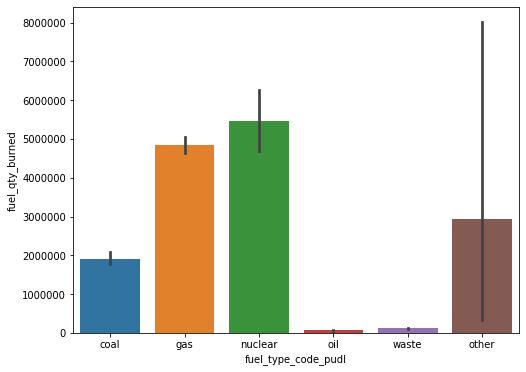

In [18]:
# 1.2 Quantity of Fuel Burned By Fuel Type

plt.figure(figsize=(8,6))
ax = sns.barplot(df['fuel_type_code_pudl'],df['fuel_qty_burned'])

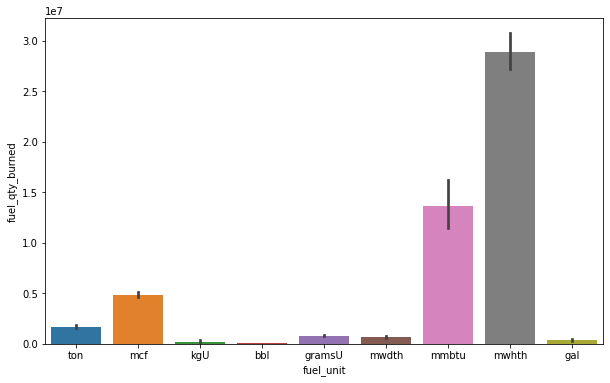

In [19]:
# 1.3 Quantity of Fuel Burned By Fuel Unit

plt.figure(figsize=(10,6))
ax = sns.barplot(df['fuel_unit'],df['fuel_qty_burned'])

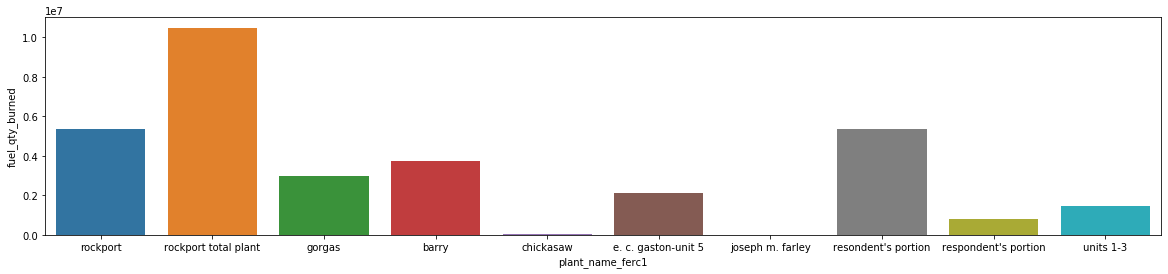

In [21]:
# 1.4 Quantity of Fuel Burned by Top 10 Plant

fuel_plant = df['plant_name_ferc1']
fuel_plant = fuel_plant[:10,]
plt.figure(figsize=(20,4))
ax = sns.barplot(fuel_plant,df['fuel_qty_burned'])

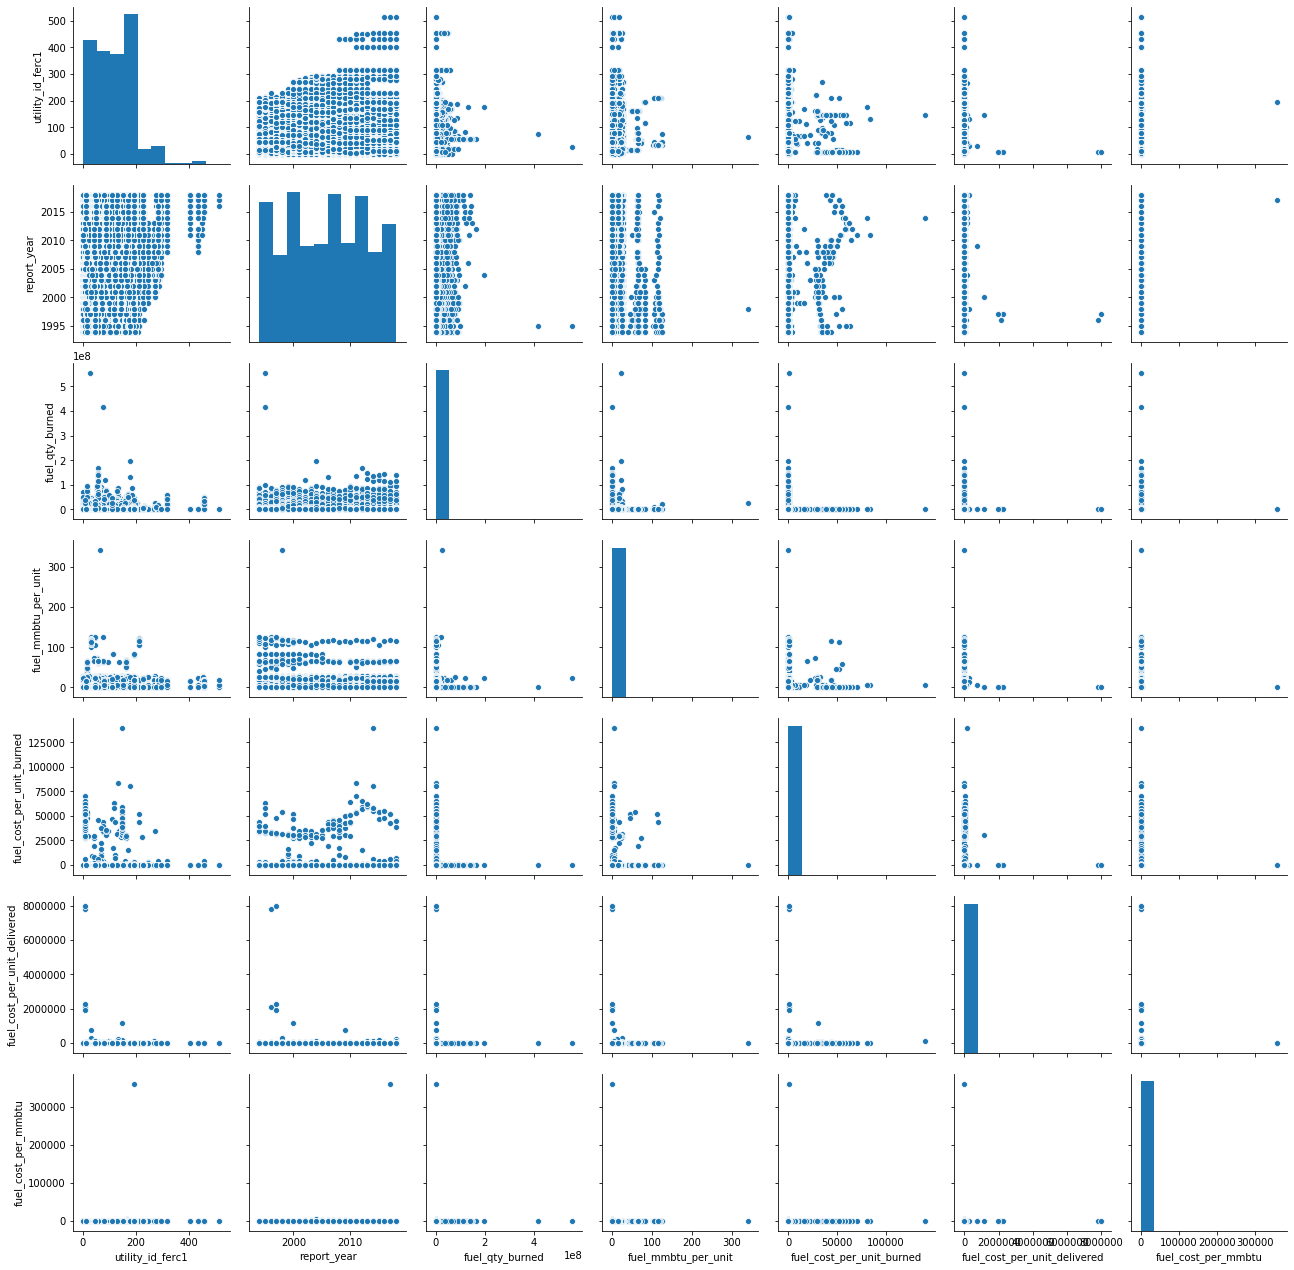

In [23]:
# Pairplot of the data

ax = sns.pairplot(df)


# A) Categorical Data Analysis


In [41]:
# Let us print the categorical features we saved earlier on
print(categorical_features)

['record_id', 'plant_name_ferc1', 'fuel_type_code_pudl', 'fuel_unit']


Observations 
* record_id is a unique identifier.



# 1) Plot of Plant name

In [42]:
# Showing the value count of each element in plant name
df.plant_name_ferc1.value_counts()

big stone              156
four corners           151
riverside              133
coyote                 121
louisa                 119
                      ... 
hunter #3                1
gerald and               1
rocky ford diesels       1
salem (i)                1
presque isle-unit 4      1
Name: plant_name_ferc1, Length: 2315, dtype: int64


The plot below shows the first 15 companies based on locations with 'big stone' and 'four corners' <br>
being found in 156 and 151 locations repectively.<br>
Also, there is significant imbalance in the count of plant name.<br>
**NOTE: The number of companies is not proportional to the quantity of fuel consumed in that company**

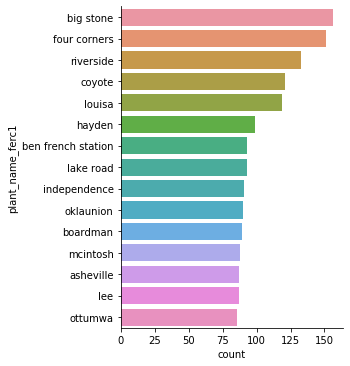

In [44]:
sns.catplot(y='plant_name_ferc1', data = df,kind='count', 
            order=df.plant_name_ferc1.value_counts().nlargest(15).index)# Top 15 plants

# 2) Plot of Fuel_unit

In [46]:
# Showing the value count of each element in fuel unit
df.fuel_unit.value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

__It is knwon that commonly used unit is 'mcf' followed by 'ton'.__

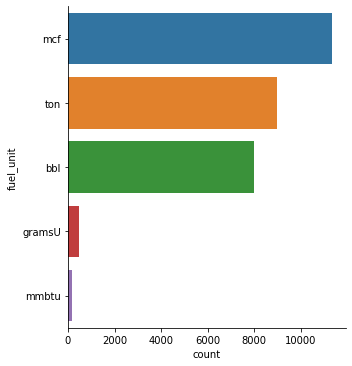

In [47]:
# Plot of fuel unit
sns.catplot(y='fuel_unit', data = df.dropna(),kind='count', 
            order=df.fuel_unit.value_counts().nlargest(5).index)

# 3) Plot by fuel type

In [49]:
# Showing the value counts of each item in fuel_type_code_pudl
df.fuel_type_code_pudl.value_counts()

gas        11486
coal        8547
oil         8064
nuclear      818
waste        441
other        167
Name: fuel_type_code_pudl, dtype: int64

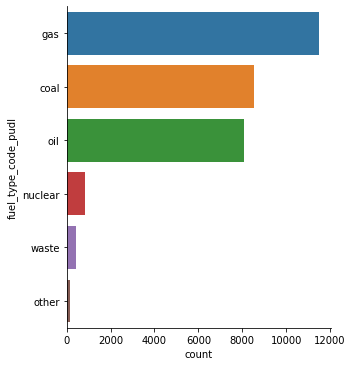

In [50]:
# Plotting the fuel_type_code_pudl
sns.catplot(y='fuel_type_code_pudl', data=df, kind='count',
           order= df.fuel_type_code_pudl.value_counts().index)

__Gas is the most common fuel type and mcf is the most common fuel unit.
Research has it that gas is mostly measured in mcf. There might be a relation between fuel type and fuel unit.
We will explore that in bivariant analysis.__

# B) Numerical Data Analysis

In [51]:
# Let us print the numerical features we saved earlier on
numerical_features

['utility_id_ferc1',
 'report_year',
 'fuel_qty_burned',
 'fuel_mmbtu_per_unit',
 'fuel_cost_per_unit_burned',
 'fuel_cost_per_unit_delivered',
 'fuel_cost_per_mmbtu']

__In our summary statistics, we identified an issue of outliers with some numerical variables.
Let us look into this by vizualizing fuel_cost_per_mmbtu feature.__

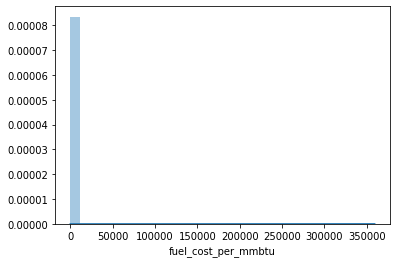

In [53]:
# Let us plot a distplot of the fuel_cost_per_mmbtu feature
sns.distplot(df.fuel_cost_per_mmbtu, bins=30)

__We can see that majority of the values clusters between 0 to 2000, while there is an extension
upto the value of 350000.__

# Removing the outlier

In [54]:
# Let us dig deep by feeding values of fuel_cost_per_mmbtu that is greater than or equal to 350000

df[df.fuel_cost_per_mmbtu > 349999]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
28256,f1_fuel_2017_12_193_1_7,193,2017,rothschild,waste,ton,297109.0,0.000009,29.629,29.629,359278.0


In [56]:
# At this point only one row was returned. Lets reduce the value till it includes two rows

#fuel_df[fuel_df.fuel_cost_per_mmbtu > 30000]
#fuel_df[fuel_df.fuel_cost_per_mmbtu > 10000]
#fuel_df[fuel_df.fuel_cost_per_mmbtu > 5000]
df[df.fuel_cost_per_mmbtu > 3500]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
13077,f1_fuel_2004_12_166_0_4,166,2004,celanese ii,other,NaN,1082417.0,0.001000,3.516,3.516,3515.924
28256,f1_fuel_2017_12_193_1_7,193,2017,rothschild,waste,ton,297109.0,0.000009,29.629,29.629,359278.000


So 
At this point we have that the next fuel_cost_per_mmbtu value after 359278.000 is 3515.924
The difference is very clear so we will drop the row with the highest fuel_cost_per_mmbtu value

# So drop it using the row index and save the fuel_df

In [58]:
# Let us drop it using the row index and save the fuel_df
df.drop([28256], inplace=True)

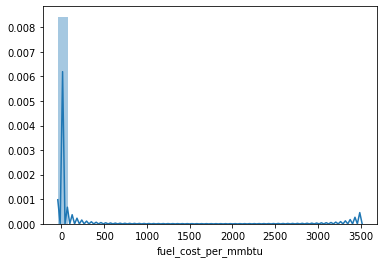

In [60]:
# Let us plot a distplot of the fuel_cost_per_mmbtu feature after removing the outlier
sns.distplot(df.fuel_cost_per_mmbtu, bins=30)

The plot is a bit better though this is nowhere near ideal.

# C) Statistical features of the Dataset:

Skewness is a statistical measure that quantifies the symmetry of the distribution. <br>
Skewness is the standardized third central moment and Kurtosis is the standardized <br>
fourth central moment.<br>
* A distribution may be skewed in the positive direction or negative direction.<br>
* A positively skewed distribution has a long tail on the right side and negatively <br>
&nbsp;&nbsp;&nbsp;&nbsp;skewed distribution has a long tail on the left side.<br>
* A right tailed distribution or a  positively skewed distribution has its mean greater<br>
&nbsp;&nbsp;&nbsp;&nbsp;than the median as the outliers present in the skewed right tail of the distribution influence the mean.<br>
* A left tailed distribution has its mean smaller than the median.

In [110]:
# 1) Skewness for numerical values

df.skew()

utility_id_ferc1                  0.605158
report_year                       0.006979
fuel_qty_burned                  15.851254
fuel_mmbtu_per_unit               4.135218
fuel_cost_per_unit_burned        19.787102
fuel_cost_per_unit_delivered    105.012448
fuel_cost_per_mmbtu              58.439028
dtype: float64

**If skewness is less than −1 or greater than +1, the distribution is highly skewed.** <br>
**If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.**<br>
**If skewness is between −½ and +½, the distribution is approximately symmetric.**<br>
<br>
Most of the numeric features are greatly skewwed except report_year

## D) Multivariate Analysis:

Use of 'pd.groupby()' and some visualization


a) Let us find relation in our categorical features
We will consider the following features: ['plant_name_ferc1', 'fuel_type_code_pudl', 'fuel_unit']

__Relationship between fuel type and fuel name__

In [64]:
df.groupby(['fuel_type_code_pudl','fuel_unit'])['fuel_unit'].count()

fuel_type_code_pudl  fuel_unit
coal                 bbl              1
                     mcf              5
                     mmbtu           52
                     ton           8438
gas                  bbl              2
                     mcf          11333
                     mmbtu           94
                     ton              4
nuclear              gramsU         464
                     kgU            110
                     mmbtu           34
                     mwdth           95
                     mwhth          100
oil                  bbl           7952
                     gal             81
                     mcf              7
                     ton              3
other                bbl             42
                     gal              3
                     mcf              9
                     ton             77
waste                bbl              1
                     ton            435
Name: fuel_unit, dtype: int64

__Though the most common fuel unit is mcf, we have observed that each fuel type has its own
most coommon fuel unit.
Let us print them out because we will use them to fill the NA values in fuel unit column.__

In [65]:
df.groupby(['fuel_type_code_pudl','fuel_unit'])['fuel_unit'].count().nlargest(5)

fuel_type_code_pudl  fuel_unit
gas                  mcf          11333
coal                 ton           8438
oil                  bbl           7952
nuclear              gramsU         464
waste                ton            435
Name: fuel_unit, dtype: int64

__NB: other has bbl as mode
The mode of each fuel type is h]shown in the next output.__

In [67]:
df.groupby(['fuel_type_code_pudl'])['fuel_unit'].count()

fuel_type_code_pudl
coal        8496
gas        11433
nuclear      803
oil         8043
other        131
waste        436
Name: fuel_unit, dtype: int64

__Let us fill the NA values in fuel unit with the mode gotten from groupby.__

In [69]:
df['fuel_unit'] = df.groupby(['fuel_type_code_pudl'])['fuel_unit'].transform(lambda x: x.fillna(x.mode()[0]))

In [71]:
# Check if any null values exist
df.isna().any()

record_id                       False
utility_id_ferc1                False
report_year                     False
plant_name_ferc1                False
fuel_type_code_pudl             False
fuel_unit                       False
fuel_qty_burned                 False
fuel_mmbtu_per_unit             False
fuel_cost_per_unit_burned       False
fuel_cost_per_unit_delivered    False
fuel_cost_per_mmbtu             False
dtype: bool

# Quiz - Stage A

In [77]:
# Q1.  Identity Matrix

imatrix = np.identity(3)
print(imatrix)


# Answer : np.identity(3)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [80]:
# Q2. Missing feature and imputation techniques

# Since the categorical data is having missing data i.e. fuel_unit so we will use mode imputation technique.

# Mode: The mode of a set of data values is the value that appears most often. If X is a discrete random variable, the mode is the value x at which the probability mass function takes its maximum value. In other words, it is the value that is most likely to be sampled

df.groupby(['fuel_type_code_pudl','fuel_unit'])['fuel_unit'].count().nlargest(5)

# Below is the explaination

# Answer: categorical & mode imputation

fuel_type_code_pudl  fuel_unit
gas                  mcf          11386
coal                 ton           8489
oil                  bbl           7973
nuclear              gramsU         479
waste                ton            439
Name: fuel_unit, dtype: int64

In [75]:
df.groupby(['fuel_type_code_pudl'])['fuel_unit'].count()

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        440
Name: fuel_unit, dtype: int64

In [76]:
# So fill the NA values in fuel unit with the mode gotten from groupby.

In [78]:
df['fuel_unit'] = df.groupby(['fuel_type_code_pudl'])['fuel_unit'].transform(lambda x: x.fillna(x.mode()[0]))

In [81]:
# Check if any null values exist
df.isna().any()

record_id                       False
utility_id_ferc1                False
report_year                     False
plant_name_ferc1                False
fuel_type_code_pudl             False
fuel_unit                       False
fuel_qty_burned                 False
fuel_mmbtu_per_unit             False
fuel_cost_per_unit_burned       False
fuel_cost_per_unit_delivered    False
fuel_cost_per_mmbtu             False
dtype: bool

In [122]:
# Q3. Second and Third lowest correlation


a= abs(df.corrwith(df['fuel_cost_per_unit_burned'])).sort_values()

# Answer: fuel_mmbtu_per_unit_delivered and fuel_cost_per_unit_delivered

In [109]:
# Q4.

yearly_cost = df.groupby(["report_year","fuel_type_code_pudl"])["fuel_cost_per_unit_burned"].mean()

year_1998,year_1994 = yearly_cost.loc[[1994,1998],"coal"]
percentage_change = ((year_1994-year_1998)/(year_1998))*100
percentage_change


# Answer: -21%

-12.458551963280119

In [104]:
# Q5.

df_year = df.groupby('report_year')["fuel_cost_per_unit_delivered"].mean().nlargest()
df_year

# Answer : 1997

report_year
1997    11140.197239
1996     9196.705948
2000      985.362877
2009      652.694163
2018      499.269966
Name: fuel_cost_per_unit_delivered, dtype: float64

In [ ]:
# Q6.



In [ ]:
# Q7.

In [ ]:
# Q8.

In [ ]:
# Q9.

In [ ]:
# Q10.